In [10]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

In [11]:
# Define the image dimensions
img_height, img_width = 224, 224

# Define the batch size
batch_size = 32

In [12]:
def load_data(directory):
    datagen = ImageDataGenerator(rescale=1./255)
    generator = datagen.flow_from_directory(
        directory,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )
    return generator

In [13]:
train_generator = load_data(r"C:\Users\navon\OneDrive\Documents\ai workd\dataset\train")
test_generator = load_data(r"C:\Users\navon\OneDrive\Documents\ai workd\dataset\test")

Found 3047 images belonging to 35 classes.
Found 349 images belonging to 35 classes.


In [14]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(35, activation='softmax')  # Change this line to 35 units
])

In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

In [16]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 95s 985ms/step - accuracy: 0.0765 - loss: 3.4189 - val_accuracy: 0.3238 - val_loss: 2.3144
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 624ms/step - accuracy: 0.2989 - loss: 2.3759 - val_accuracy: 0.5272 - val_loss: 1.6443
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 622ms/step - accuracy: 0.4457 - loss: 1.8676 - val_accuracy: 0.7421 - val_loss: 1.0071
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 619ms/step - accuracy: 0.6075 - loss: 1.3218 - val_accuracy: 0.8424 - val_loss: 0.5999
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 618ms/step - accuracy: 0.7938 - loss: 0.7528 - val_accuracy: 0.9255 - val_loss: 0.3180
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 618ms/step - accuracy: 0.9083 - loss: 0.3313 - val_accuracy: 0.9341 - val_loss: 0.3331
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 621ms/step - accuracy: 0.9484 - loss: 0.2077 - val_accuracy: 0.9599 - val_loss: 0.3000
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 621ms/step - accuracy: 0.9673 - loss: 0.1141 - val_accu

In [20]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 571ms/step - accuracy: 0.9595 - loss: 0.2419
Test loss: 0.221
Test accuracy: 0.963


In [21]:
# Save the model
model.save('product_defect_detection.h5')
model.save('product_defect_detection.keras')

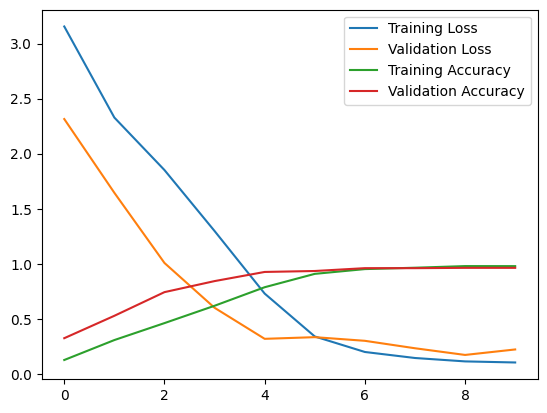

In [22]:
# Plot the loss and accuracy graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()